In [5]:
import mne
import Sleep_Scripts.PCA as P
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Data
# files = [
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr"
# ]
# 
# raw_list = [mne.io.read_raw_brainvision(f, preload=True) for f in files]
# 
# raw = mne.concatenate_raws(raw_list)
raw = mne.io.read_raw_brainvision("D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr", preload=True)

Extracting parameters from D:/Intercranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr...
Setting channel info structure...
Reading 0 ... 3599951  =      0.000 ... 14399.804 secs...


In [3]:
# Electrode coordinates in dict, when plotting data
ch_pos = """TBAL01,-14.7597476322,-6.0460235101,-25.5850007858,3.0,0.0,0.0,1.0
TBAL02,-23.8502152247,-7.70579691945,-27.6707326656,3.0,0.0,0.0,1.0
TBAL03,-32.4608618068,-12.6057765014,-29.63862474,3.0,0.0,0.0,1.0
TBAL04,-41.370943494,-16.1057770418,-27.2858877757,3.0,0.0,0.0,1.0
TBAR01,21.2692424822,5.55464401557,-30.1200892402,3.0,0.0,0.0,1.0
TBAR02,28.1692503576,-3.79814041336,-37.3024835687,3.0,0.0,0.0,1.0
TBAR03,37.5692568698,-11.3284314731,-41.4334355564,3.0,0.0,0.0,1.0
TBAR04,43.1692432567,-15.5635416157,-39.246865846,3.0,0.0,0.0,1.0
TBPL01,-23.478251022,-13.1057756875,-33.3071591505,3.0,0.0,0.0,1.0
TBPL02,-33.5012997336,-13.7057761814,-39.0027410899,3.0,0.0,0.0,1.0
TBPL03,-45.801073729,-13.0057764103,-36.6366464371,3.0,0.0,0.0,1.0
TBPL04,-52.4781443242,-23.2753493694,-31.7442255101,3.0,0.0,0.0,1.0
TBPR01,20.6446672648,-21.6057967717,-19.6160681079,3.0,0.0,0.0,1.0
TBPR02,30.7692376934,-23.65680533,-25.8999656924,3.0,0.0,0.0,1.0
TBPR03,43.1692432567,-23.3569327329,-30.1174648231,3.0,0.0,0.0,1.0
TBPR04,50.5459098816,-20.6685314178,-27.4362754822,3.0,0.0,0.0,1.0
TL01,-27.8025787284,2.94381197154,-25.7704129743,3.0,0.0,0.0,1.0
TL02,-27.9365535293,-0.279436019242,-23.7418962605,3.0,0.0,0.0,1.0
TL03,-28.0707225378,-3.50735637725,-21.1212751002,3.0,0.0,0.0,1.0
TL04,-28.2295310669,-7.32820944667,-18.2068963446,3.0,0.0,0.0,1.0
TL05,-28.3396384753,-9.97725515117,-16.4586378269,3.0,0.0,0.0,1.0
TL06,-28.4989150123,-13.8092139509,-13.5360229063,3.0,0.0,0.0,1.0
TL07,-28.6584652797,-17.6477583006,-11.1994184237,3.0,0.0,0.0,1.0
TL08,-28.8305926124,-21.78895962,-8.56481415359,3.0,0.0,0.0,1.0
TL09,-29.015366183,-26.2344823097,-5.92694205245,3.0,0.0,0.0,1.0
TL10,-29.1881556051,-30.3916128605,-2.68966251791,3.0,0.0,0.0,1.0
TLL01,-47.8871924903,-72.5484123087,18.1256679487,3.0,0.0,0.0,1.0
TLL02,-52.9486591588,-66.2035528005,11.3705646227,3.0,0.0,0.0,1.0
TLL03,-57.5667604801,-59.7549015954,6.16475846109,3.0,0.0,0.0,1.0
TLL04,-61.3207819246,-51.8835704436,-0.649540821411,3.0,0.0,0.0,1.0
TLL05,-62.1513350833,-43.9877113335,-8.1682017328,3.0,0.0,0.0,1.0
TLL06,-59.9517782305,-36.5551807906,-14.0210782192,3.0,0.0,0.0,1.0
TLR01,50.9354580199,-61.2221223265,35.6122598906,3.0,0.0,0.0,1.0
TLR02,56.3130495324,-57.5204924895,26.8586421252,3.0,0.0,0.0,1.0
TLR03,60.3850664507,-53.4868406374,17.6509928111,3.0,0.0,0.0,1.0
TLR04,63.5416089254,-48.8778620888,8.17602884676,3.0,0.0,0.0,1.0
TLR05,62.279967278,-43.1869707932,-1.92096520101,3.0,0.0,0.0,1.0
TLR06,61.2345414416,-37.6393440826,-11.7239910971,3.0,0.0,0.0,1.0
TR01,33.3714097913,-4.4088639018,-18.7292952372,3.0,0.0,0.0,1.0
TR02,33.3510352113,-9.47626908733,-15.0937380628,3.0,0.0,0.0,1.0
TR03,33.3342005433,-13.6646346592,-11.566355921,3.0,0.0,0.0,1.0
TR04,33.3182376484,-17.6344374532,-8.69896375808,3.0,0.0,0.0,1.0
TR05,33.3035979759,-21.2750296433,-6.38186984,3.0,0.0,0.0,1.0
TR06,33.2889588438,-24.9171582312,-3.18123325233,3.0,0.0,0.0,1.0
TR07,33.2765329151,-28.0086550114,-0.64169525692,3.0,0.0,0.0,1.0
TR08,33.2620909232,-31.5997591186,2.09893684532,3.0,0.0,0.0,1.0
TR09,33.247440994,-35.2437181225,4.74957913061,3.0,0.0,0.0,1.0
TR10,33.2310138769,-39.3311978161,8.39535551481,3.0,0.0,0.0,1.0
"""
final_names = [
    "TR10","TR09","TR08","TR07","TR06","TR05","TR04","TR03","TR02","TR01",
    "TLR06","TLR05","TLR04","TLR03","TLR02","TLR01",
    "TLL06","TLL05","TLL04","TLL03","TLL02","TLL01",
    "TL10","TL09","TL08","TL07","TL06","TL05","TL04","TL03","TL02","TL01",
    "TBPR4","TBPR3","TBPR2","TBPR1",
    "TBPL4","TBPL3","TBPL2","TBPL1",
    "TBAR4","TBAR3","TBAR2","TBAR1",
    "TBAL4","TBAL3","TBAL2","TBAL1"
]
non_eeg = ['Cb1','Cb2','EKG1','EKG2','T5','T6','C3','Cz','C4','Oz','EOG1','EOG2','EMG1','EMG2']
raw.set_channel_types({ch: 'misc' for ch in non_eeg})
ch_pos = P.parse_positions_with_mapping(ch_pos, final_names, to_meters=True)
print(ch_pos)


montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame="head")

raw.set_montage(montage)

raw_pos = ch_pos = """TBAL01,-14.7597476322,-6.0460235101,-25.5850007858,3.0,0.0,0.0,1.0
TBAL02,-23.8502152247,-7.70579691945,-27.6707326656,3.0,0.0,0.0,1.0
TBAL03,-32.4608618068,-12.6057765014,-29.63862474,3.0,0.0,0.0,1.0
TBAL04,-41.370943494,-16.1057770418,-27.2858877757,3.0,0.0,0.0,1.0
TBAR01,21.2692424822,5.55464401557,-30.1200892402,3.0,0.0,0.0,1.0
TBAR02,28.1692503576,-3.79814041336,-37.3024835687,3.0,0.0,0.0,1.0
TBAR03,37.5692568698,-11.3284314731,-41.4334355564,3.0,0.0,0.0,1.0
TBAR04,43.1692432567,-15.5635416157,-39.246865846,3.0,0.0,0.0,1.0
TBPL01,-23.478251022,-13.1057756875,-33.3071591505,3.0,0.0,0.0,1.0
TBPL02,-33.5012997336,-13.7057761814,-39.0027410899,3.0,0.0,0.0,1.0
TBPL03,-45.801073729,-13.0057764103,-36.6366464371,3.0,0.0,0.0,1.0
TBPL04,-52.4781443242,-23.2753493694,-31.7442255101,3.0,0.0,0.0,1.0
TBPR01,20.6446672648,-21.6057967717,-19.6160681079,3.0,0.0,0.0,1.0
TBPR02,30.7692376934,-23.65680533,-25.8999656924,3.0,0.0,0.0,1.0
TBPR03,43.1692432567,-23.3569327329,-30.1174648231,3.0,0.0,0.0,1.0
TBPR04,50.5459098816,-20.6685314178,-27.4362754822,3.0,0.0,0.0,1.0
TL01,-27.8025787284,2.94381197154,-25.7704129743,3.0,0.0,0.0,1.0
TL02,-27.9365535293,-0.279436019242,-23.7418962605,3.0,0.0,0.0,1.0
TL03,-28.0707225378,-3.50735637725,-21.1212751002,3.0,0.0,0.0,1.0
TL04,-28.2295310669,-7.32820944667,-18.2068963446,3.0,0.0,0.0,1.0
TL05,-28.3396384753,-9.97725515117,-16.4586378269,3.0,0.0,0.0,1.0
TL06,-28.4989150123,-13.8092139509,-13.5360229063,3.0,0.0,0.0,1.0
TL07,-28.6584652797,-17.6477583006,-11.1994184237,3.0,0.0,0.0,1.0
TL08,-28.8305926124,-21.78895962,-8.56481415359,3.0,0.0,0.0,1.0
TL09,-29.015366183,-26.2344823097,-5.92694205245,3.0,0.0,0.0,1.0
TL10,-29.1881556051,-30.3916128605,-2.68966251791,3.0,0.0,0.0,1.0
TLL01,-47.8871924903,-72.5484123087,18.1256679487,3.0,0.0,0.0,1.0
TLL02,-52.9486591588,-66.2035528005,11.3705646227,3.0,0.0,0.0,1.0
TLL03,-57.5667604801,-59.7549015954,6.16475846109,3.0,0.0,0.0,1.0
TLL04,-61.3207819246,-51.8835704436,-0.649540821411,3.0,0.0,0.0,1.0
TLL05,-62.1513350833,-43.9877113335,-8.1682017328,3.0,0.0,0.0,1.0
TLL06,-59.9517782305,-36.5551807906,-14.0210782192,3.0,0.0,0.0,1.0
TLR01,50.9354580199,-61.2221223265,35.6122598906,3.0,0.0,0.0,1.0
TLR02,56.3130495324,-57.5204924895,26.8586421252,3.0,0.0,0.0,1.0
TLR03,60.3850664507,-53.4868406374,17.6509928111,3.0,0.0,0.0,1.0
TLR04,63.5416089254,-48.8778620888,8.17602884676,3.0,0.0,0.0,1.0
TLR05,62.279967278,-43.1869707932,-1.92096520101,3.0,0.0,0.0,1.0
TLR06,61.2345414416,-37.6393440826,-11.7239910971,3.0,0.0,0.0,1.0
TR01,33.3714097913,-4.4088639018,-18.7292952372,3.0,0.0,0.0,1.0
TR02,33.3510352113,-9.47626908733,-15.0937380628,3.0,0.0,0.0,1.0
TR03,33.3342005433,-13.6646346592,-11.566355921,3.0,0.0,0.0,1.0
TR04,33.3182376484,-17.6344374532,-8.69896375808,3.0,0.0,0.0,1.0
TR05,33.3035979759,-21.2750296433,-6.38186984,3.0,0.0,0.0,1.0
TR06,33.2889588438,-24.9171582312,-3.18123325233,3.0,0.0,0.0,1.0
TR07,33.2765329151,-28.0086550114,-0.64169525692,3.0,0.0,0.0,1.0
TR08,33.2620909232,-31.5997591186,2.09893684532,3.0,0.0,0.0,1.0
TR09,33.247440994,-35.2437181225,4.74957913061,3.0,0.0,0.0,1.0
TR10,33.2310138769,-39.3311978161,8.39535551481,3.0,0.0,0.0,1.0
"""

TBAL01,-14.7597476322,-6.0460235101,-25.5850007858,3.0,0.0,0.0,1.0
TBAL02,-23.8502152247,-7.70579691945,-27.6707326656,3.0,0.0,0.0,1.0
TBAL03,-32.4608618068,-12.6057765014,-29.63862474,3.0,0.0,0.0,1.0
TBAL04,-41.370943494,-16.1057770418,-27.2858877757,3.0,0.0,0.0,1.0
TBAR01,21.2692424822,5.55464401557,-30.1200892402,3.0,0.0,0.0,1.0
TBAR02,28.1692503576,-3.79814041336,-37.3024835687,3.0,0.0,0.0,1.0
TBAR03,37.5692568698,-11.3284314731,-41.4334355564,3.0,0.0,0.0,1.0
TBAR04,43.1692432567,-15.5635416157,-39.246865846,3.0,0.0,0.0,1.0
TBPL01,-23.478251022,-13.1057756875,-33.3071591505,3.0,0.0,0.0,1.0
TBPL02,-33.5012997336,-13.7057761814,-39.0027410899,3.0,0.0,0.0,1.0
TBPL03,-45.801073729,-13.0057764103,-36.6366464371,3.0,0.0,0.0,1.0
TBPL04,-52.4781443242,-23.2753493694,-31.7442255101,3.0,0.0,0.0,1.0
TBPR01,20.6446672648,-21.6057967717,-19.6160681079,3.0,0.0,0.0,1.0
TBPR02,30.7692376934,-23.65680533,-25.8999656924,3.0,0.0,0.0,1.0
TBPR03,43.1692432567,-23.3569327329,-30.1174648231,3.0,0.0,0.0,1

C:\Users\timmi\AppData\Local\Temp\ipykernel_13336\3633285907.py:63: RuntimeWarning: The unit for channel(s) C3, C4, Cb1, Cb2, Cz, EKG1, EKG2, EMG1, EMG2, EOG1, EOG2, Oz, T5, T6 has changed from V to NA.
  raw.set_channel_types({ch: 'misc' for ch in non_eeg})


<RawBrainVision | 2_night1_02.dat, 62 x 3599952 (14399.8 s), ~1.66 GiB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 5.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Filter length: 1651 samples (6.604 s)

Top channels:
PC1 -> TR06
PC2 -> TLL04


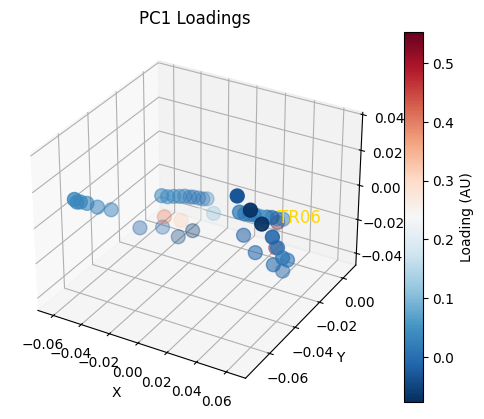

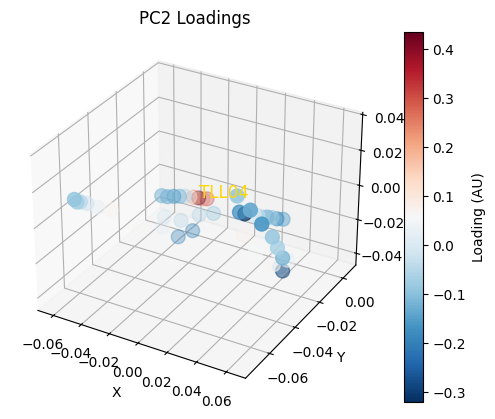

In [4]:
# band options are: beta, gamma, delta, theta, sigma, total and noise
P.channel_pca(raw, 'delta', raw_pos)